In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Pacific_Extent = pd.read_excel(filepath, sheet_name='Pacific-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Pacific_Extent)
fp.date_time(Pacific_Extent)

,Extent,Date
0,668714.275,1979-01-01
1,566930.458,1979-02-01
2,688420.115,1979-03-01
3,859963.043,1979-04-01
4,1127120.160,1979-05-01
...,...,...
533,1134056.102,2023-06-01
534,1484824.377,2023-07-01
535,1671324.717,2023-08-01
536,1726376.097,2023-09-01


In [5]:
scaler = MinMaxScaler()
Pacific_Extent['Extent'] = scaler.fit_transform(Pacific_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Pacific_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Pacific_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2256 - root_mean_squared_error: 0.4750

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 6s 77ms/step - loss: 0.2186 - root_mean_squared_error: 0.4676 - val_loss: 0.2231 - val_root_mean_squared_error: 0.4723
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1738 - root_mean_squared_error: 0.4169

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.1726 - root_mean_squared_error: 0.4154 - val_loss: 0.1816 - val_root_mean_squared_error: 0.4262
Epoch 3/50
44/53 [=======================>......] - ETA: 0s - loss: 0.1416 - root_mean_squared_error: 0.3762

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.1385 - root_mean_squared_error: 0.3722 - val_loss: 0.1448 - val_root_mean_squared_error: 0.3805
Epoch 4/50
44/53 [=======================>......] - ETA: 0s - loss: 0.1135 - root_mean_squared_error: 0.3369

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 80ms/step - loss: 0.1091 - root_mean_squared_error: 0.3303 - val_loss: 0.1151 - val_root_mean_squared_error: 0.3393
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.0871 - root_mean_squared_error: 0.2951

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0879 - root_mean_squared_error: 0.2965 - val_loss: 0.0900 - val_root_mean_squared_error: 0.3000
Epoch 6/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0663 - root_mean_squared_error: 0.2575

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0673 - root_mean_squared_error: 0.2595 - val_loss: 0.0678 - val_root_mean_squared_error: 0.2604
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0523 - root_mean_squared_error: 0.2287

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0523 - root_mean_squared_error: 0.2287 - val_loss: 0.0540 - val_root_mean_squared_error: 0.2324
Epoch 8/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0385 - root_mean_squared_error: 0.1962

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0374 - root_mean_squared_error: 0.1933 - val_loss: 0.0434 - val_root_mean_squared_error: 0.2082
Epoch 9/50
52/53 [============================>.] - ETA: 0s - loss: 0.0303 - root_mean_squared_error: 0.1741

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0302 - root_mean_squared_error: 0.1737 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1772
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0230 - root_mean_squared_error: 0.1517

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0236 - root_mean_squared_error: 0.1535 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0174 - root_mean_squared_error: 0.1318

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0172 - root_mean_squared_error: 0.1310 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1317
Epoch 12/50
52/53 [============================>.] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1257

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0159 - root_mean_squared_error: 0.1261 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0169 - root_mean_squared_error: 0.1301

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0169 - root_mean_squared_error: 0.1301 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0977
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1019

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0829
Epoch 15/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0109 - root_mean_squared_error: 0.1042

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0107 - root_mean_squared_error: 0.1032 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 16/50
41/53 [======================>.......] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1219

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0136 - root_mean_squared_error: 0.1167 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0655
Epoch 17/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0972

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0648
Epoch 18/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 19/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0661
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728
Epoch 21/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1018

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0637
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0086 - root_mean_squared_error: 0.0925 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0643
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0653
Epoch 25/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - val_loss: 0.0048 - val_root_mean_squared

INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


INFO:tensorflow:Assets written to: Pacific_model_LT2\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0609
Epoch 40/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 41/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1043
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0669
Epoch 43/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0620
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0107 - root_mean_squared_error: 0.1036 - val_loss: 0.0097 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.3892095367113748 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

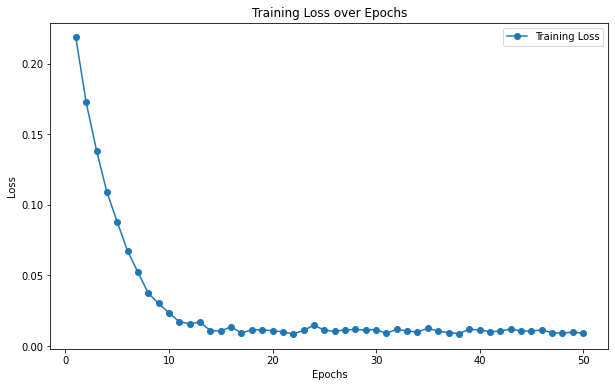

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

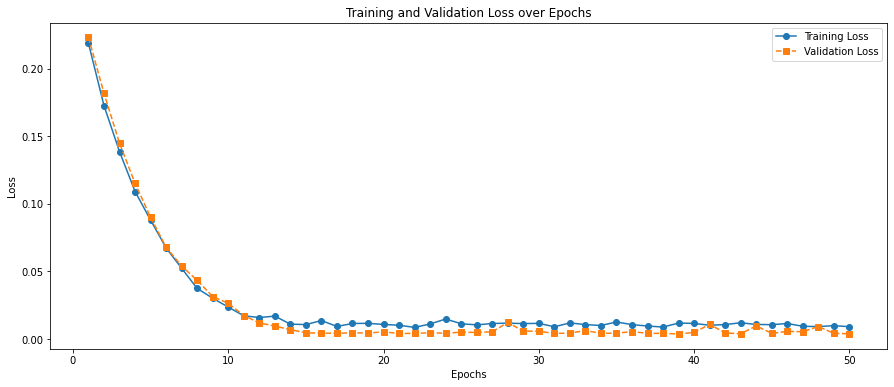

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Pacific_model_LT2/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 1s 5ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.060464095634839586
MAE : 0.04805718416638277


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,1.328070e+06,1400934.040
1,1.568797e+06,1701391.499
2,1.785574e+06,1890231.668
3,1.971479e+06,2203401.829
4,1.798362e+06,1960480.542
5,1.510234e+06,1264318.504
6,8.460372e+05,863206.294
7,4.057874e+05,635624.004
8,3.376437e+05,460009.672
9,5.424322e+05,610848.036


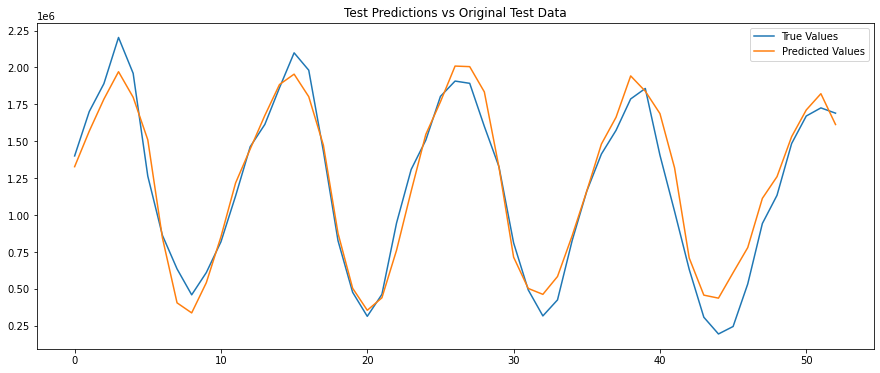

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

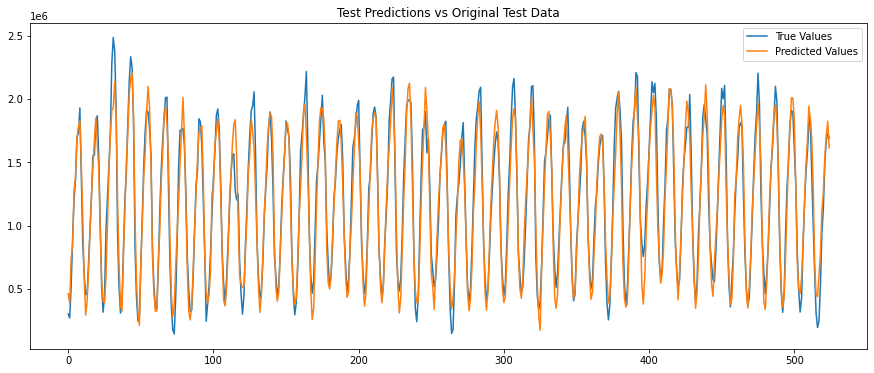

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()